In [1]:
%load_ext autoreload
%autoreload 2

from scripts.wandb_experiments.texgen_vs_gr_experiment import TexGenVsGrExperiment
import multiprocessing as mp
import torch

torch.set_grad_enabled(False)
mp.set_start_method("spawn", force=True)

e = TexGenVsGrExperiment("ymca_stormtrooper")

In [5]:
e.calc_sync_experiment()

ExperimentSyncAction(to_delete=[], to_run=[])

In [6]:
e.sync_experiment(interactive=True, rerun_all=False)
# action = e.calc_sync_experiment()
# action.to_run

Experiment up-to-date!


In [7]:
data = e.get_data()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb:   20 of 20 files downloaded.  
wandb:   20 of 20 files downloaded.  
wandb:   1 of 1 files downloaded.  


In [10]:
# from text3d2video.utilities.ipython_utils import display_vid

from text3d2video.utilities.ipython_utils import display_vid

display_vid(e.comparison_vid(data), width=1300)

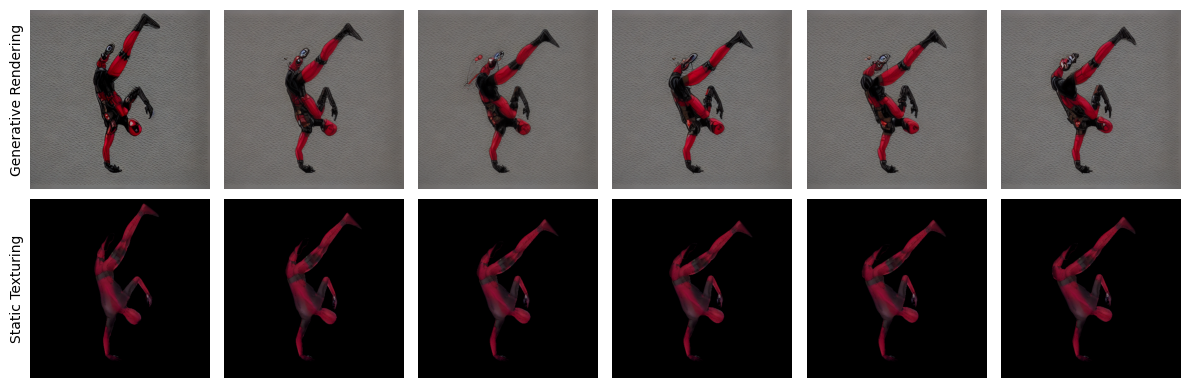

In [22]:
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims_grid


n_images = 6
indices = ordered_sample_indices(data.gr_frames, n_images)

gr_frames = [data.gr_frames[i] for i in indices]
renders = [data.renders[i] for i in indices]

fig, axs = display_ims_grid(
    [gr_frames, renders],
    show=False,
    scale=2,
    row_titles=["Generative Rendering", "Static Texturing"],
)

# define zoom winsow
box = Bbox.from_bounds(200, 70, 100, 100)

# for ax in axs.flatten():
# add_zoom_inset(ax, box)

In [17]:
from omegaconf import OmegaConf
from scripts.wandb_runs.make_rgb_texture import MakeTextureConfig


cfg = MakeTextureConfig(
    video_anim='video:latest'
)

OmegaConf.structured(cfg)
OmegaConf.create(cfg)

{'video_anim': 'video:latest'}

In [4]:
import wandb_util.wandb_util as wbu